# **Customer Campaign Segmentation** -- Berliani Larasati

---






# **Introduction**

- In this project used the bank marketing dataset to categorize customers into different groups to help make decisions on how best to approach each group of customers.

- The data used in this project is `bank-add-full-alt.csv`.

- The dataset can be obtained from this website: [Bank Marketing Dataset](https://archive.ics.uci.edu/dataset/222/bank+marketing).

# **Import libraries**

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

# **Import Data**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/binggas/public-dataset/main/bank%2Bmarketing/bank-additional/bank-additional-full-alt.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# **Add Customer ID Column**

*   Create a `customer_id` column using combination of `age`, `job`, `marital`, `education`, `housing`, and `loan` columns.



In [ ]:
# Add customer ID

df["customer_id"] = df["age"].astype(str) + '_' + df["job"].astype(str) + '_' + df["marital"].astype(str) + '_' + \
                      df["education"].astype(str) + '_' + df["housing"].astype(str) + '_' + df["loan"]
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,customer_id
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,56_housemaid_married_basic.4y_no_no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,57_services_married_high.school_no_no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,37_services_married_high.school_yes_no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40_admin._married_basic.6y_no_no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,56_services_married_high.school_no_yes


# **Segmentation**

## **Step 1**

- Start the customer segmentation process by performing simple statistics to understand the distribution for the variables of interest.

- Look into the `mean`, `median`, `minimum value`, `maximum value`, `25th percentile`, `75th percentile`, and `95th percentile`.

- In the cell below, calculate the  `contact_per_campaign` for per `customer_id` and `campaign`.

- Save the result into a DataFrame called `campaign_count`.

In [ ]:
# Find the number of row by customer_id and campaign.
campaign_count = pd.DataFrame(df.groupby(["customer_id", "campaign"]).size())

# Rename the result column into `contact_per_campaign`
campaign_count.rename(columns={0:"contact_per_campaign"}, inplace=True)

# Show the first 5 row
campaign_count.head()

contact_per_campaign
customer_id                                campaign                      
17_student_single_basic.9y_unknown_unknown 2                            1
17_student_single_basic.9y_yes_no          2                            1
                                           3                            1
17_student_single_unknown_no_yes           1                            1
17_student_single_unknown_yes_no           3                            1

- Now, perform a similar calculation but per `customer_id`, `campaign`, and `y`.

- This step will help calculate the response rate for every customer and campaign.

- Save the result into a DataFrame called `campaign_respond_count`.

In [ ]:
# Find the number of row by customer_id, campaign, and y.
campaign_respond_count = pd.DataFrame(df.groupby(["customer_id", "campaign", "y"]).size())

# Rename the result column into `count_respond`
campaign_respond_count.rename(columns={0:"count_respond"}, inplace=True)

# Only get the result where y = yes
campaign_respond_count = campaign_respond_count.loc[(slice(None), slice(None), "yes"), :]

# Show the first 5 row
campaign_respond_count.head()

,,,count_respond
customer_id,campaign,y,
17_student_single_basic.9y_unknown_unknown,2,yes,1
17_student_single_unknown_no_yes,1,yes,1
18_student_single_basic.4y_yes_no,1,yes,1
18_student_single_basic.6y_no_yes,2,yes,1
18_student_single_basic.9y_no_no,2,yes,1


- The two DataFrames that have been created will allow for the calculation of the `response_rate` for every `customer_id` and `campaign`.

- Use the `.merge()` function to combine the two DataFrames. Make sure to join the DataFrames based on the appropriate variables.

- Save the result into a DataFrame called `campaign_response`.

- Save the response rate result into a column called `response_rate`. The response rate is calculated by dividing `count_respond` by `contact_per_campaign`.

In [ ]:
# Merge campaign_respond_count with campaign_count
campaign_response = campaign_respond_count.merge(campaign_count, left_index=True, right_index=True)

# Calculate response_rate
campaign_response["response_rate"] = campaign_response["count_respond"] / campaign_response["contact_per_campaign"]

# Show the first 5 row
campaign_response.head()

,,,count_respond,contact_per_campaign,response_rate
customer_id,campaign,y,,,
17_student_single_basic.9y_unknown_unknown,2,yes,1,1,1.0
17_student_single_unknown_no_yes,1,yes,1,1,1.0
18_student_single_basic.4y_yes_no,1,yes,1,2,0.5
18_student_single_basic.6y_no_yes,2,yes,1,1,1.0
18_student_single_basic.9y_no_no,2,yes,1,1,1.0


- The next DataFrame to create will calculate the statistics per `customer_id`.

- Calculate the following:
  1. `contact_frequency`: Frequency of contact per `customer_id`
  2. `sum_duration_of_contact`: Sum of the duration of all contact per `customer_id`
  3. `avg_duration_of_contact`: Average duration of all contact per `customer_id`
  4. `campaign_engagement_cnt`: Number of unique campaigns per `customer_id`

- Save the result into a DataFrame called `customer_agg`.

In [ ]:
# Aggregate data per customer_id
customer_agg = df.groupby("customer_id").agg({"customer_id":"count",
                                              "duration":["sum","mean"],
                                              "campaign":"nunique"
                                              })

# If multiindex, use the code below to flatten the columns
customer_agg.columns = customer_agg.columns.get_level_values(1)

# Rename the columns appropriately
customer_agg.rename(columns={"count": "contact_frequency",
                             "sum": "sum_duration_of_contact",
                             "mean": "avg_duration_of_contact",
                             "nunique": "campaign_engagement_cnt"
                             }, inplace=True)

# Show the first 5 row
customer_agg.head()

,contact_frequency,sum_duration_of_contact,avg_duration_of_contact,campaign_engagement_cnt
customer_id,,,,
17_student_single_basic.9y_unknown_unknown,1,498,498.0,1
17_student_single_basic.9y_yes_no,2,274,137.0,2
17_student_single_unknown_no_yes,1,896,896.0,1
17_student_single_unknown_yes_no,1,432,432.0,1
18_student_single_basic.4y_no_no,1,108,108.0,1


- Categorize each `campaign_engagement_cnt`.

- This step of labeling converts a numerical variable into a categorical one, making the data more digestible depending on the business domain.

- Based on the business domain, categorize `campaign_engagement_cnt` into a new variable called `campaign_engagement_level`:

|Group | Label |
|-|-|
|`campaign_engagement_cnt` = 1| `1 Campaign`|
|1 < `campaign_engagement_cnt` < 5| `2-4 Campaign`|
|`campaign_engagement_cnt` >= 5| `5+ Campaign`|

In [ ]:
# Label for `1 Campaign`
customer_agg.loc[customer_agg["campaign_engagement_cnt"] == 1,"campaign_engagement_level"] = "1 Campaign"

# Label for `2-4 Campaign`
customer_agg.loc[(customer_agg["campaign_engagement_cnt"] > 1) & (customer_agg["campaign_engagement_cnt"] < 5),"campaign_engagement_level"] = "2-4 Campaigns"

# Label for `5+ Campaign`
customer_agg.loc[customer_agg["campaign_engagement_cnt"] >= 5,"campaign_engagement_level"] = "5+ Campaigns"

In [ ]:
# Check if the logic works by showing the first 5 row
customer_agg.head()

,contact_frequency,sum_duration_of_contact,avg_duration_of_contact,campaign_engagement_cnt,campaign_engagement_level
customer_id,,,,,
17_student_single_basic.9y_unknown_unknown,1,498,498.0,1,1 Campaign
17_student_single_basic.9y_yes_no,2,274,137.0,2,2-4 Campaigns
17_student_single_unknown_no_yes,1,896,896.0,1,1 Campaign
17_student_single_unknown_yes_no,1,432,432.0,1,1 Campaign
18_student_single_basic.4y_no_no,1,108,108.0,1,1 Campaign


In [ ]:
# Sanity check the result by aggregating row count for every `campaign_engagement_level` and `campaign_engagement_cnt`
customer_agg.groupby(["campaign_engagement_level", "campaign_engagement_cnt"]).size()

campaign_engagement_level  campaign_engagement_cnt
1 Campaign                 1                          5680
2-4 Campaigns              2                          2234
                           3                          1102
                           4                           630
5+ Campaigns               5                           362
                           6                           213
                           7                           138
                           8                            67
                           9                            24
                           10                           14
                           11                            2
                           12                            1
                           13                            2
dtype: int64

- With the two DataFrames for campaign response per `customer_id` (`campaign_response`) and statistics per `customer_id` (`customer_agg`), combine them to explore the distribution of the data.

- Merge the two DataFrames by `customer_id` into a new DataFrame called `campaign_merge`.

In [ ]:
campaign_merge = campaign_response.merge(customer_agg, how="inner", left_index=True, right_index=True)
campaign_merge.head()

,,,count_respond,contact_per_campaign,response_rate,contact_frequency,sum_duration_of_contact,avg_duration_of_contact,campaign_engagement_cnt,campaign_engagement_level
customer_id,campaign,y,,,,,,,,
17_student_single_basic.9y_unknown_unknown,2,yes,1,1,1.0,1,498,498.0,1,1 Campaign
17_student_single_unknown_no_yes,1,yes,1,1,1.0,1,896,896.0,1,1 Campaign
18_student_single_basic.4y_yes_no,1,yes,1,2,0.5,2,548,274.0,1,1 Campaign
18_student_single_basic.6y_no_yes,2,yes,1,1,1.0,1,368,368.0,1,1 Campaign
18_student_single_basic.9y_no_no,2,yes,1,1,1.0,1,412,412.0,1,1 Campaign


- Now, check the distribution.

- Use the pre-defined functions below to aggregate the 25th, 50th, 75th, and 95th percentiles quickly. Use them in an `.agg()` function.

- Calculate distribution statistics for `response_rate` per `campaign_engagement_level`.

- Aggregate the following values:
  - minimum
  - average
  - maximum
  - 25th percentile
  - 50th percentile
  - 75th percentile
  - 95th percentile

In [ ]:
# Defining function for 25th Percentile
def p25(x):
    return np.percentile(x,0.25)


# Defining function for 50th Percentile
def p50(x):
    return np.percentile(x,0.5)


# Defining function for 75th Percentile
def p75(x):
    return np.percentile(x,0.75)


# Defining function for 95th Percentile
def p95(x):
    return np.percentile(x,0.95)

In [ ]:
# Calculate distribution statistics for response_rate per campaign_engagement_level
campaign_engagement_level = campaign_merge.groupby("campaign_engagement_level").agg({"response_rate": ["min", "mean", "max", p25, p50, p75, p95]})

# Flatten multiindex column
campaign_engagement_level.columns = campaign_engagement_level.columns.get_level_values(1)

# Reset index
campaign_engagement_level.reset_index(inplace=True)

# Show the result
campaign_engagement_level

,campaign_engagement_level,min,mean,max,p25,p50,p75,p95
0,1 Campaign,0.166667,0.880680,1.0,0.200000,0.250000,0.250000,0.250000
1,2-4 Campaigns,0.071429,0.661390,1.0,0.090909,0.100000,0.111111,0.111111
2,5+ Campaigns,0.038462,0.371066,1.0,0.047608,0.049976,0.050000,0.052632


In [ ]:
# Melt the previous DataFrame and save it into a new DataFrame called campaign_engagement_melt

campaign_engagement_melt = pd.melt(campaign_engagement_level, id_vars=["campaign_engagement_level"], value_vars=["min", "mean", "max", "p25", "p50", "p75", "p95"])
campaign_engagement_melt.head(10)

,campaign_engagement_level,variable,value
0,1 Campaign,min,0.166667
1,2-4 Campaigns,min,0.071429
2,5+ Campaigns,min,0.038462
3,1 Campaign,mean,0.880680
4,2-4 Campaigns,mean,0.661390
5,5+ Campaigns,mean,0.371066
6,1 Campaign,max,1.000000
7,2-4 Campaigns,max,1.000000
8,5+ Campaigns,max,1.000000
9,1 Campaign,p25,0.200000


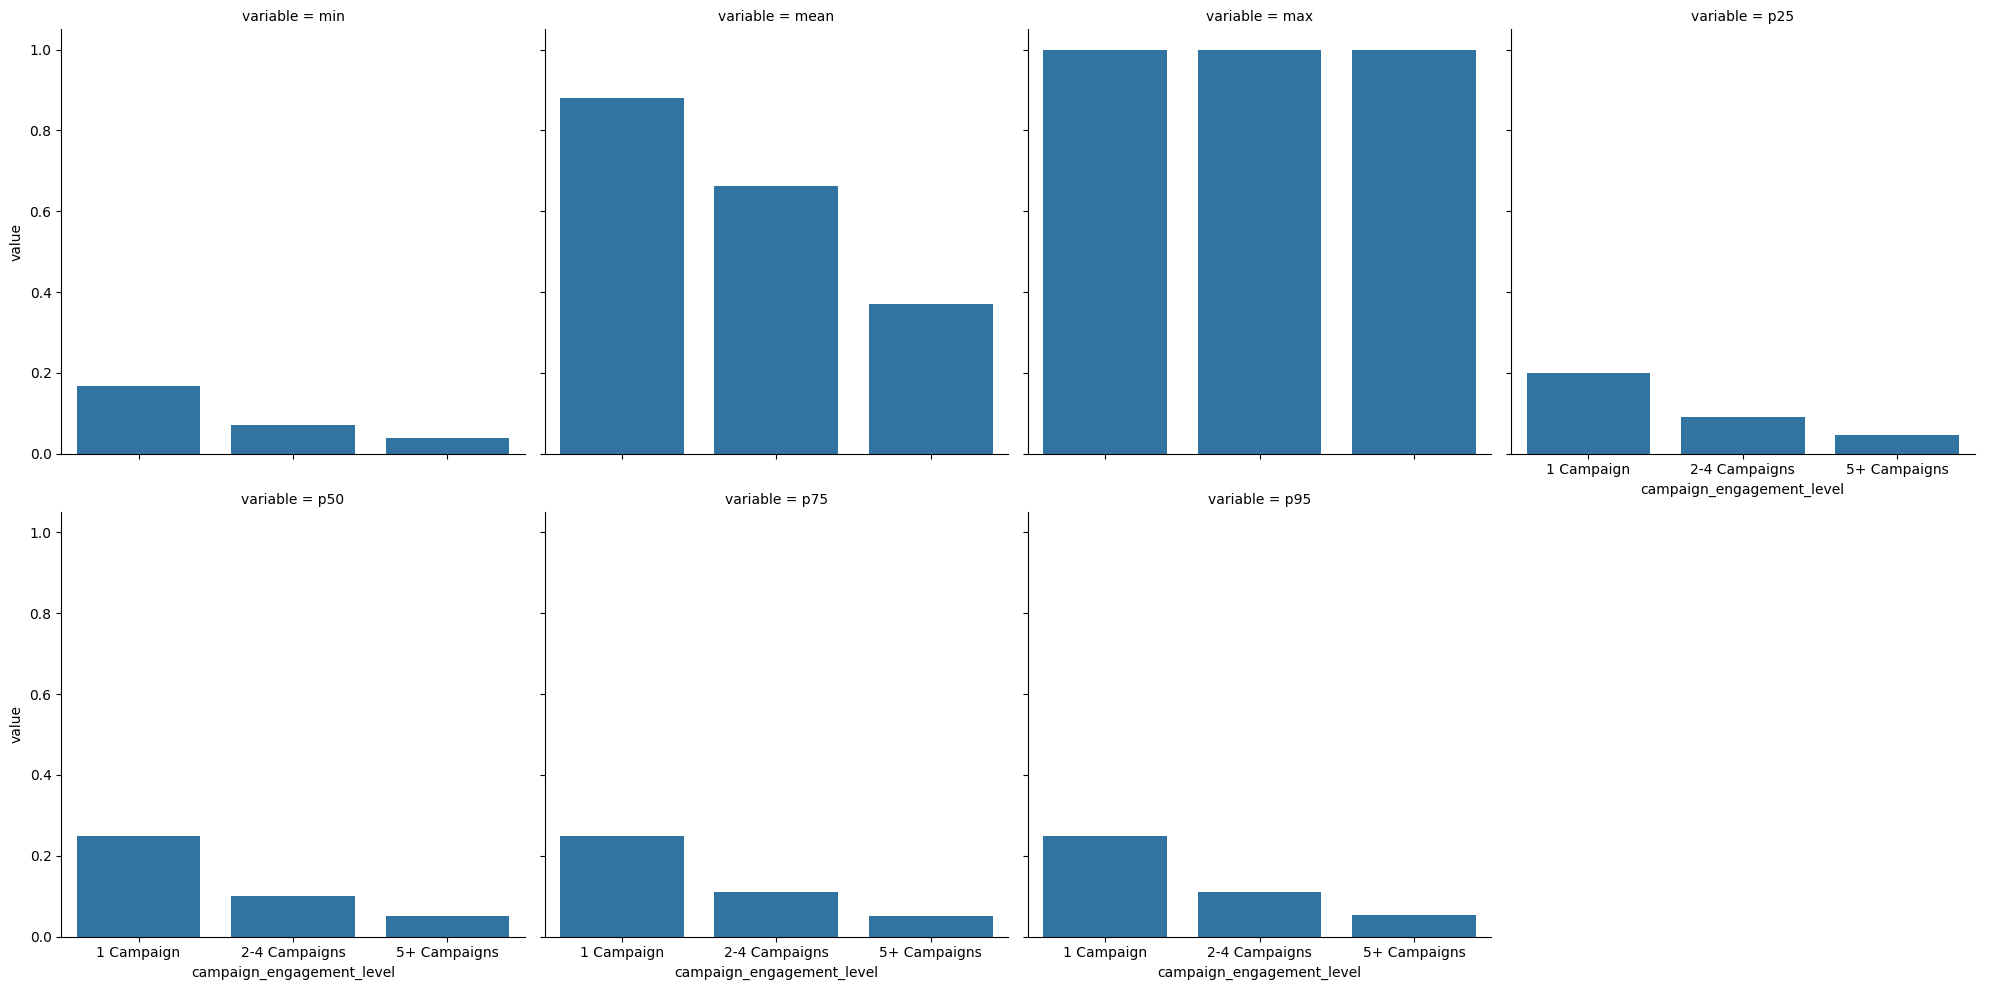

In [ ]:
# Draw plot to help us understand the data above
sns.catplot(data = campaign_engagement_melt,
            x= "campaign_engagement_level",
            y= "value",
            kind= "bar",
            col= "variable",
            col_wrap=4
            )

# Show the plot
plt.show()

- Learning from the Distribution:
  - 1 Campaign: Highest mean engagement (0.880680), indicating high probability of engagement. Wide range from 0.166667 to 1.000000.
  - 2-4 Campaigns: Moderate mean engagement (0.661390). Range from 0.071429 to 1.000000.
  - 5+ Campaigns: Lowest mean engagement (0.371066). Range from 0.038462 to 1.000000.

- Better Chance of Response:
  - 1 Campaign category shows the highest mean engagement (0.880680), suggesting it has the best chance of eliciting a response from customers.

- Skewed Distribution:
  - The 1 Campaign category exhibits skewness, with a significant gap between the mean (0.880680) and the 25th percentile (0.200000). This indicates that while most customers engage highly, there's a subset with much lower engagement levels, skewing the overall distribution.

**Step 2: Define Engagement Level Labels**

- Define engagement level labels that align with the stakeholders' objectives:
  - Highly Engaged:
    - Customers who have high contact frequency, long duration of contact, and high campaign engagement.
  - Moderately Engaged:
    - Customers with moderate contact frequency, duration of contact, and campaign engagement.
  - Low Engagement:
    - Customers with low contact frequency, short duration of contact, and low campaign engagement.

- In this step, insights about the distribution of the data are provided by the data team, and segmentation is done collaboratively across multiple teams to incorporate various perspectives.

- The definitions have been established through communication and deliberation with other teams in the company.

- If you want a quick glimpse at the data, use `.describe()` function on `campaign_merge` to get quick statistics for all numerical columns.

In [ ]:
# Describe numerical columns
campaign_merge.describe()

,count_respond,contact_per_campaign,response_rate,contact_frequency,sum_duration_of_contact,avg_duration_of_contact,campaign_engagement_cnt
count,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000
mean,1.256431,3.796913,0.617485,12.070674,3388.010019,349.944110,3.617113
std,0.760296,4.769829,0.352509,15.324696,3989.388900,221.040406,2.377360
min,1.000000,1.000000,0.038462,1.000000,63.000000,44.000000,1.000000
25%,1.000000,1.000000,0.285714,2.000000,774.000000,231.857143,2.000000
50%,1.000000,2.000000,0.500000,6.000000,1840.000000,287.000000,3.000000
75%,1.000000,4.000000,1.000000,17.000000,4617.000000,390.733333,5.000000
max,10.000000,54.000000,1.000000,114.000000,26895.000000,2926.000000,13.000000


# **Step 3: Calculate score based on threshold**

- To simplify the segmentation, here are the definitions and thresholds to segment every customer based on different variables.
- Each will be converted to a score between `1 and 3`, and later, we will combine all the composite variables into a single score based on predefined weights.

### **Contact Frequency**

| | Engagement Level | Threshold/Range |
|-|-|-|
| 1 | Low Engagement | <= 2 |
| 2 | Moderately Engaged | > 2 and <= 4 |
| 3 | Highly Engaged | > 4 |


### **Duration of Contact**

| | Engagement Level | Threshold/Range |
|-|-|-|
| 1 | Low Engagement | <= 500 |
| 2 | Moderately Engaged | > 500 and <= 1000 |
| 3 | Highly Engaged | > 1000 |


### **Average Duration of Contact**

| | Engagement Level | Threshold/Range |
|-|-|-|
| 1 | Low Engagement | <= 200 |
| 2 | Moderately Engaged | > 200 and <= 400 |
| 3 | Highly Engaged | > 400 |


### **Campaign Engagement**

| | Engagement Level | Threshold/Range |
|-|-|-|
| 1 | Low Engagement | 1 campaign |
| 2 | Moderately Engaged | 2-4 campaigns |
| 3 | Highly Engaged | 5+ campaigns |


### **Campaign Conversion Rate**

| | | Engagement Level | Threshold/Range |
|-|-|-|-|
| 1 | 1 campaign | Low Engagement | <= 0.5 |
| 2 | | Moderately Engaged | > 0.5 and <= 0.75 |
| 3 | | Highly Engaged | > 0.75 |
| 1 | 2-4 campaigns | Low Engagement | <= 0.5 |
| 2 | | Moderately Engaged | > 0.5 and <= 0.75 |
| 3 | | Highly Engaged | > 0.75 |
| 1 | 5+ campaigns | Low Engagement | <= 0.25 |
| 2 | | Moderately Engaged | > 0.25 and <= 0.5 |
| 3 | | Highly Engaged | > 0.5 |

In [ ]:
# copy campaign_merge into a new DataFrame called campaign_score
campaign_score = campaign_merge.copy()

# reset index
campaign_score.reset_index(inplace=True)

# show first 5 rows
campaign_score.head()

,customer_id,campaign,y,count_respond,contact_per_campaign,response_rate,contact_frequency,sum_duration_of_contact,avg_duration_of_contact,campaign_engagement_cnt,campaign_engagement_level
0,17_student_single_basic.9y_unknown_unknown,2,yes,1,1,1.0,1,498,498.0,1,1 Campaign
1,17_student_single_unknown_no_yes,1,yes,1,1,1.0,1,896,896.0,1,1 Campaign
2,18_student_single_basic.4y_yes_no,1,yes,1,2,0.5,2,548,274.0,1,1 Campaign
3,18_student_single_basic.6y_no_yes,2,yes,1,1,1.0,1,368,368.0,1,1 Campaign
4,18_student_single_basic.9y_no_no,2,yes,1,1,1.0,1,412,412.0,1,1 Campaign


- Before proceeding, collect the median `response_rate` per `customer_id` and place it in a new column named `campaign_rate_per_customer`.

- Save the aggregated data into a new DataFrame called `campaign_rate_per_customer`.

In [ ]:
# Get 50th percentile response_rate, group by customer_id. Save it into campaign_rate_per_customer
campaign_rate_per_customer = pd.DataFrame(campaign_score.groupby("customer_id")["response_rate"].agg(p50))

# Rename to result column to be campaign_rate_per_customer
campaign_rate_per_customer.rename(columns={"response_rate":"campaign_rate_per_customer"}, inplace=True)

# Merge campaign_score with campaign_rate_per_customer by customer_id
campaign_score = campaign_score.merge(campaign_rate_per_customer, how="left", on="customer_id")

# Show first 5 rows
campaign_score.head()

,customer_id,campaign,y,count_respond,contact_per_campaign,response_rate,contact_frequency,sum_duration_of_contact,avg_duration_of_contact,campaign_engagement_cnt,campaign_engagement_level,campaign_rate_per_customer
0,17_student_single_basic.9y_unknown_unknown,2,yes,1,1,1.0,1,498,498.0,1,1 Campaign,1.0
1,17_student_single_unknown_no_yes,1,yes,1,1,1.0,1,896,896.0,1,1 Campaign,1.0
2,18_student_single_basic.4y_yes_no,1,yes,1,2,0.5,2,548,274.0,1,1 Campaign,0.5
3,18_student_single_basic.6y_no_yes,2,yes,1,1,1.0,1,368,368.0,1,1 Campaign,1.0
4,18_student_single_basic.9y_no_no,2,yes,1,1,1.0,1,412,412.0,1,1 Campaign,1.0


- Referring to the tables above, we are now ready for the scoring process.

- Obtain the 5 components of the composite scores:
  1. `contact_frequency_score`
  2. `duration_of_contact_score`
  3. `avg_duration_of_contact_score`
  4. `campaign_rate_score`
  5. `campaign_engagement_score`

In [ ]:
# Contact frequency: contact_frequency_score

campaign_score.loc[campaign_score["contact_frequency"] <= 2,"contact_frequency_score"] = 1
campaign_score.loc[(campaign_score["contact_frequency"] > 2) & (campaign_score["contact_frequency"] <= 4),"contact_frequency_score"] = 2
campaign_score.loc[campaign_score["contact_frequency"] > 4,"contact_frequency_score"] = 3



# Duration of Contact: duration_of_contact_score

campaign_score.loc[campaign_score["sum_duration_of_contact"] <= 500,"duration_of_contact_score"] = 1
campaign_score.loc[(campaign_score["sum_duration_of_contact"] > 500) & (campaign_score["sum_duration_of_contact"] <= 1000),"duration_of_contact_score"] = 2
campaign_score.loc[campaign_score["sum_duration_of_contact"] > 1000,"duration_of_contact_score"] = 3


# Avg Duration of Contact: avg_duration_of_contact_score

campaign_score.loc[campaign_score["avg_duration_of_contact"] <= 200,"avg_duration_of_contact_score"] = 1
campaign_score.loc[(campaign_score["avg_duration_of_contact"] > 200) & (campaign_score["avg_duration_of_contact"] <= 400),"avg_duration_of_contact_score"] = 2
campaign_score.loc[campaign_score["avg_duration_of_contact"] > 400,"avg_duration_of_contact_score"] = 3


# Campaign Rate: campaign_rate_score

campaign_score.loc[(campaign_score["campaign_engagement_cnt"] < 5) & (campaign_score["campaign_rate_per_customer"] <= 0.5), "campaign_rate_score"] = 1
campaign_score.loc[(campaign_score["campaign_engagement_cnt"] < 5) & (campaign_score["campaign_rate_per_customer"] > 0.5) & (campaign_score["campaign_rate_per_customer"] <= 0.75), "campaign_rate_score"] = 2
campaign_score.loc[(campaign_score["campaign_engagement_cnt"] < 5) & (campaign_score["campaign_rate_per_customer"] > 0.75) , "campaign_rate_score"] = 3

campaign_score.loc[(campaign_score["campaign_engagement_cnt"] >= 5) & (campaign_score["campaign_rate_per_customer"] <= 0.25), "campaign_rate_score"] = 1
campaign_score.loc[(campaign_score["campaign_engagement_cnt"] >= 5) & (campaign_score["campaign_rate_per_customer"] > 0.25) & (campaign_score["campaign_rate_per_customer"] <= 0.5), "campaign_rate_score"] = 2
campaign_score.loc[(campaign_score["campaign_engagement_cnt"] >= 5) & (campaign_score["campaign_rate_per_customer"] > 0.5) , "campaign_rate_score"] = 3



# Campaign Engagement: campaign_engagement_score
campaign_score.loc[campaign_score["campaign_engagement_cnt"] == 1,"campaign_engagement_score"] = 1
campaign_score.loc[(campaign_score["campaign_engagement_cnt"] > 1) & (campaign_score["campaign_engagement_cnt"] <= 4),"campaign_engagement_score"] = 2
campaign_score.loc[campaign_score["campaign_engagement_cnt"] > 4,"avg_duration_of_contact_score"] = 3

In [ ]:
# Show the first 5 rows
campaign_score.head()

,customer_id,campaign,y,count_respond,contact_per_campaign,response_rate,contact_frequency,sum_duration_of_contact,avg_duration_of_contact,campaign_engagement_cnt,campaign_engagement_level,campaign_rate_per_customer,contact_frequency_score,duration_of_contact_score,avg_duration_of_contact_score,campaign_rate_score,campaign_engagement_score
0,17_student_single_basic.9y_unknown_unknown,2,yes,1,1,1.0,1,498,498.0,1,1 Campaign,1.0,1.0,1.0,3.0,3.0,1.0
1,17_student_single_unknown_no_yes,1,yes,1,1,1.0,1,896,896.0,1,1 Campaign,1.0,1.0,2.0,3.0,3.0,1.0
2,18_student_single_basic.4y_yes_no,1,yes,1,2,0.5,2,548,274.0,1,1 Campaign,0.5,1.0,2.0,2.0,1.0,1.0
3,18_student_single_basic.6y_no_yes,2,yes,1,1,1.0,1,368,368.0,1,1 Campaign,1.0,1.0,1.0,2.0,3.0,1.0
4,18_student_single_basic.9y_no_no,2,yes,1,1,1.0,1,412,412.0,1,1 Campaign,1.0,1.0,1.0,3.0,3.0,1.0


- Next, combine the 5 composite parts into a single final score based on the weights decided by stakeholders.

</br>

|Metric|Weight by stakeholder|
|-|-|
| Contact Frequency	| 8 |
| Duration of Contact	| 7 |
| Average Duration of Contact	| 6 |
| Campaign Engagement	| 5 |
| Campaign Conversion Rate |	9 |

</br>

- Calculate the final score and save it into a new column called `overall_engagement_score`.

In [ ]:
# Calculate the final score
campaign_score["overall_engagement_score"] = (campaign_score["contact_frequency_score"] * 8) +\
                                              (campaign_score["duration_of_contact_score"] * 7) +\
                                              (campaign_score["avg_duration_of_contact_score"] * 6) +\
                                              (campaign_score["campaign_engagement_score"] * 5) +\
                                              (campaign_score["campaign_rate_score"] * 9)

- The score will help us to finally segment all customers based on this thresholds:

|Threshold|`engagement_category`|
|-|-|
|overall_engagement_score <=48|Low engagement|
|48 < overall_engagement_score <= 68|Moderate engagement|
|overall_engagement_score > 68|Highly engaged|

In [ ]:
# Categorize based on threshold, save it into a new column called `engagement_category`

campaign_score.loc[campaign_score["overall_engagement_score"] <= 48,"engagement_category"] = "Low engagement"
campaign_score.loc[(campaign_score["overall_engagement_score"] > 48) & (campaign_score["overall_engagement_score"] <= 68),"engagement_category"] = "Moderately engaged"
campaign_score.loc[campaign_score["overall_engagement_score"] > 68,"engagement_category"] = "Highly engaged"

In [ ]:
# Sanity check the result using `.value_counts()` function
campaign_score["engagement_category"].value_counts()

engagement_category
Highly engaged        1656
Moderately engaged     737
Low engagement         101
Name: count, dtype: int64

# Step 5: Check Percentage

- Every customer has now been labeled into different engagement categories.

- The last step is to determine how many users from each `campaign` fall into each `engagement_category`.

- Create a few more DataFrames to achieve this.

- First, get the unique `customer_id` per campaign.

- Save the result into a DataFrame called `campaign_level_agg`.

In [ ]:
# Find unique customer_id per campagin
campaign_level_agg = df.groupby("campaign").agg({"customer_id":"nunique"})

# Rename the result column into `total_unique_customer`
campaign_level_agg.rename(columns={"customer_id":"total_unique_customer"}, inplace=True)

# Show first 5 rows
campaign_level_agg.head()

,total_unique_customer
campaign,
1,6565
2,4973
3,3153
4,1928
5,1252


- Next, create a DataFrame for the number of unique `customer_id` per `campaign` and `y`.

- Save the result into a DataFrame called `campaign_level_respond_agg`.

- Only include data where `y = "yes"`.

In [ ]:
# Find unique customer_id per campaign and y
campaign_level_respond_agg = df.groupby(["campaign", "y"]).agg({"customer_id":"nunique"})

# Rename the result column into `responded_customers`
campaign_level_respond_agg.rename(columns={"customer_id":"responded_customers"}, inplace=True)

# Get only data with y="yes"
campaign_level_respond_agg = campaign_level_respond_agg.loc[(slice(None), "yes"), :]

# Show first 5 rows
campaign_level_respond_agg.head()

,,responded_customers
campaign,y,
1,yes,1645
2,yes,994
3,yes,511
4,yes,241
5,yes,117


- Calculate `campaign_cvr_rate` by combining the two DataFrames just created and determining the conversion rate by dividing `responded_customers` by `total_unique_customers`.

In [ ]:
# Merge campaign_level_respond_agg with campaign_level_agg
campaign_level_merge = campaign_level_respond_agg.merge(campaign_level_agg, left_index=True, right_index=True)

# Calculate campaign_cvr_rate
campaign_level_merge["campaign_cvr_rate"] = campaign_level_merge["responded_customers"] / campaign_level_merge["total_unique_customer"]

# Drop index / column `y`, we don't need it anymore
campaign_level_merge = campaign_level_merge.droplevel(1)

# Show first 5 rows
campaign_level_merge.head()

,responded_customers,total_unique_customer,campaign_cvr_rate
campaign,,,
1,1645,6565,0.250571
2,994,4973,0.199879
3,511,3153,0.162068
4,241,1928,0.125000
5,117,1252,0.093450


- Create one more DataFrame.

- Find the unique `customer_id` per `campaign` and `engagement_category` and save it into a DataFrame called `campaign_engagement_agg`.

In [ ]:
# Get unique customer_id per campaign and engagement_category
campaign_engagement_agg = campaign_score.groupby(["campaign", "engagement_category"]).agg({"customer_id":"nunique"})

# Rename the result column into `customer_cnt`
campaign_engagement_agg.rename(columns={"customer_id":"customer_cnt"}, inplace=True)

# Show first 10 rows
campaign_engagement_agg.head(10)

customer_cnt
campaign engagement_category              
1        Highly engaged                735
         Low engagement                 79
         Moderately engaged            405
2        Highly engaged                465
         Low engagement                 20
         Moderately engaged            190
3        Highly engaged                225
         Low engagement                  2
         Moderately engaged             82
4        Highly engaged                117

- Finally, calculate the percentage of each campaign and engagement category.

- Merge and calculate as usual.

- `percentage` = `customer_cnt` / `total_unique_customer`

In [ ]:
# Merge campaign_engagement_agg with campaign_level_merge
campaign_final_merge = campaign_engagement_agg.merge(campaign_level_merge, left_index=True, right_index=True)

# Calculate percentage
campaign_final_merge["percentage"] = campaign_final_merge["customer_cnt"] / campaign_final_merge["total_unique_customer"]

# Show first 5 rows
campaign_final_merge.head()

customer_cnt  responded_customers  \
campaign engagement_category                                      
1        Highly engaged                735                 1645   
         Low engagement                 79                 1645   
         Moderately engaged            405                 1645   
2        Highly engaged                465                  994   
         Low engagement                 20                  994   

                              total_unique_customer  campaign_cvr_rate  \
campaign engagement_category                                             
1        Highly engaged                        6565           0.250571   
         Low engagement                        6565           0.250571   
         Moderately engaged                    6565           0.250571   
2        Highly engaged                        4973           0.199879   
         Low engagement                        4973           0.199879   

                              percentage  
campaign engagement_category              
1        Highly engaged         0.111957  
         Low engagement         0.012034  
         Moderately engaged     0.061691  
2        Highly engaged         0.093505  
         Low engagement         0.004022

# **My Prefered Solution**

In [ ]:
campaign_final_merge.reset_index(inplace=True)
campaign_final_merge_pivot = campaign_final_merge.pivot(index="campaign", columns="engagement_category", values="percentage")
campaign_final_merge_pivot

engagement_category,Highly engaged,Low engagement,Moderately engaged
campaign,,,
1,0.111957,0.012034,0.061691
2,0.093505,0.004022,0.038206
3,0.071361,0.000634,0.026007
4,0.060685,NaN,0.015560
5,0.031949,NaN,0.010383
6,0.032028,NaN,0.014235
7,0.030035,NaN,0.005300
8,0.019074,NaN,0.002725
9,0.025926,NaN,NaN


<Axes: xlabel='engagement_category', ylabel='campaign'>

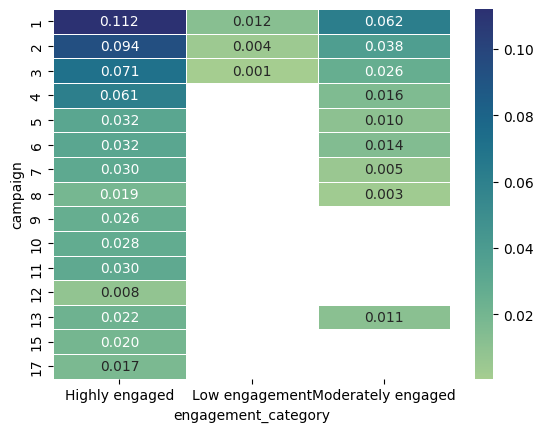

In [ ]:
sns.heatmap(campaign_final_merge_pivot,
            annot=True,
            fmt=".3f",
            linewidth=.5,
            cmap="crest"
            )

- Campaign 1 has the highest probability of engagement in the "Highly engaged" category with a value of 0.112.
- Campaign 1 is the most effective in engaging customers who fall into the "Highly engaged" category. This suggests that targeting Campaign 1 towards highly engaged customers could maximize engagement rates.